# Data and Regression in Python

## Non-standard Libraries

- Python is good a lot of stuff
    - The standard library has lists, tuples, dictionaries, loops, many more things
- But sometimes you need to use libraries outside of the standard library for whatever you're doing. For instance:
    - `BeautifulSoup` for web scraping
    - `numpy` for math/matrices
    - `itertools` for permutations/combinations and looping tools
    - `matplotlib` for making nice graphs
    - `nltk` for natural language processing
    - `functools` with tools for functional programming
    - `scikit-learn` with tools for machine learning
    - `plotly` for interactive visualization
    - `statsmodels` for statistical estimation (MLE, GMM and more)
- In this class, we're going to be using two libraries:
    - `pandas` for data loading/cleaning/visualization
    - `statsmodels`/`linearmodels` for running regression
    - and there are ports from R!
        - `rdrobust` and the `rd*` programs by Calonico et al.
            - https://rdpackages.github.io/
    


## What is an import?

- An import tells Python that you want to use a particular library that isn't a standard one 
- Usually you put all import statements in the beginning of your script 
    - Best practice is to put all imports in the beginning of the script to make it more readable and to allow any part of your code to call all your libraries
    - Since Python runs your script in order, it loads libraries first and understands when you call it afterwards.

In [22]:
numpy.array([1,2,3])

array([1, 2, 3])

In [23]:
import numpy

numpy.array([1,2,3])

array([1, 2, 3])

In [24]:
## Import statements

import pandas
import numpy
import statsmodels.api 

## Using Imported Libraries

- Once you've imported your libraries, you can call the functions from those libraries using....

- Periods! 
- The period after the library means that you're calling a "method" (function) or attribute (kind of like a characterizing feature) from within numpy

In [25]:
numpy.array([1,2,34]).var()

my_array = numpy.array([1,2,34])

my_array.var()

234.88888888888883

## Using import abbreviations

- Sometimes we don't really want to keep writing numpy, pandas statsmodels.api in front of every command
- We can use abbreviations in order to give our library a short name we can use

In [57]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import perfplot

- Now we can call everything like so:

`my_array = np.array([1,2,34])`

## Numpy and Matrices

- Numpy is an extensive library for doing matrix manipulations, random number generation, distributions and many statistics
- It is fast, as it is compiled in `C`, but in order to take advantage of its speed, you need to use it correctly
- This involves the idea of compilation and vectorization
- There is a pre-conception that while python is readable and easy to get your point across in the code (with some practice)
    - Python is slow as it is an "interpreted" language
    - this is different from a "compiled" language
        - compiled languages are the more "low-level" languages like C, C++, Rust, and Julia
- The great thing about Numpy is that their functions are actually compiled in C
- So you get a lot of the benefits of C-like speed (not really) with the readability of Python

## What is a Numpy array?

- you can think of numpy arrays as a way to extend python lists to be faster, and "vector-first"
- Numpy was modeled in many ways on Matlab's matrix language

### Constructing an array

- You can create an array from a `list` or `tuple` or create one from numpy

In [27]:
my_list = [1,2,3]
print(np.array(my_list))

print(np.eye(3))

np.arange(0,1,.2)

[1 2 3]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([0. , 0.2, 0.4, 0.6, 0.8])

### Accessing Arrays

- You can access an array using `slicing` notation
- There are few neat tricks that you can use for that

In [28]:
my_mat = np.eye(7)

# accessing one element
print(my_mat[0,0])
print(my_mat[0,1])

# accessing a row
print(my_mat[0,:])

# accessing a column
print(my_mat[:,1])

# accessing only some parts 
print(my_mat[2:, :-2]) # note that you can actually access from the end by using negative indices


1.0
0.0
[1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0.]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Python Loops vs. Numpy

- When you do something in Python that needs to be done many times, you can use a looping patterns (or maybe comprehensions)
- Let's say you have a list of numbers and you want to multiply each element by 2. You might do this in a loop, save the sum and divide by the number


In [29]:
# importing required packages
import numpy as np
  
# size of arrays and lists
size = 1000000
  
# declaring lists
list1 = range(size)
list2 = range(size)
  
# declaring arrays
array1 = np.arange(size)
array2 = np.arange(size)


In [30]:
%%timeit -n1

# multiplying elements of both the lists and stored in another list
resultantList = []

for a,b in zip(list1, list2):
    resultantList.append(a*b)



101 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%%timeit -n1

# multiplying elements of both the Numpy arrays and stored in another Numpy array
resultantArray = array1 * array2
  


The slowest run took 6.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1.01 ms ± 991 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Numpy and Broadcasting

- As you can see above, numpy also requires less code to do the same thing
- Numpy treats arrays as the most important type and so it "overloads" operators so that they works on arrays.

In [32]:
# multiplying an array
print(array1*2)

# adding to an array
print(array1 + 1)

# multiplying an array by an array 
print(array1*array2)

# adding an array to an array
print(array1 +  array2)

# dividing an array by and array
print(array1/array2)

#squaring an array
print(array1**2) # note that squaring is a double start `**`, not a caret `^`


[      0       2       4 ... 1999994 1999996 1999998]
[      1       2       3 ...  999998  999999 1000000]
[           0            1            4 ... 999994000009 999996000004
 999998000001]
[      0       2       4 ... 1999994 1999996 1999998]
[nan  1.  1. ...  1.  1.  1.]
[           0            1            4 ... 999994000009 999996000004
 999998000001]


/var/folders/22/d2d1hrtn3kl9cq0gsx95c6lr0000gn/T/ipykernel_75280/2433643273.py:14: RuntimeWarning: invalid value encountered in true_divide
  print(array1/array2)


- You can see that when we divided by 0 above, the first element was `nan`. 
- This is "Not a Number".
    - This is the same as a missing variable in Stata
    - When numpy encounters an operation that is undefined, it outputs `nan`. You can also call this with `np.nan`.
    

## 2D arrays with Numpy

- Many times, we will be working matrices instead of vectors. There are many matrix operations used in Numpy that can be used.
- You can do all the same operations as above to 2,3,...N dimensional arrays

In [33]:
matrix1 = np.array([
    [1,2,3],
    [2,3,4]
])

matrix2 = np.array([
    [3,2,3],
    [2,5,4]
])

# check the shape of the array
matrix1.shape


(2, 3)

In [34]:
# dot product
matrix1.T @ matrix2

# same as np.dot(matrix1, matrix2)

array([[ 7, 12, 11],
       [12, 19, 18],
       [17, 26, 25]])

## Useful Matrix Operations

- Numpy has lots of useful matrix operations that can be used for manipulating matrices.
- We will consider several that will be useful:
    - Creating an identity matrix
    - Taking an inverse
    - Creating random numbers
    - `argmax`
    - reshaping to another size
    - transposing

In [35]:
# Create an identity matrix
idt = np.identity(5)

idt

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [36]:
# Taking the inverse of a matrix
np.linalg.inv(idt)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [37]:
### What if it's not invertible?
np.linalg.inv(matrix1)

LinAlgError: Last 2 dimensions of the array must be square

### Creating Random Numbers

- For this we need to create an instance of a random number generator
- Then we can use it to create random numbers of any shape

In [38]:
# create random number generator
rng = np.random.default_rng(seed=234) # note the seed for reproducibility

rng.normal(0,1, size=(3,4))

# TASK: For fun, create a set of random normal numbers of shape (3,4,2)
# three dimensional arrays like this useful for later when we talk about 
# computer vision techniques where matrices have an x location, y location and an RGB color

array([[ 0.5025043 ,  0.6279455 ,  0.4938691 ,  0.58220841],
       [-0.0178953 ,  0.12903416, -1.41617161, -0.79757285],
       [ 0.86682439,  0.45729492, -2.87617571,  1.99326946]])

In [39]:
# Using a different distribution
rng.beta(1,2, size=(10,2))

array([[0.22305358, 0.2493569 ],
       [0.39522036, 0.38621425],
       [0.20372624, 0.2578221 ],
       [0.71948889, 0.29246537],
       [0.39689523, 0.0436202 ],
       [0.68627906, 0.65519899],
       [0.32177503, 0.1370209 ],
       [0.00907196, 0.63501746],
       [0.27005937, 0.81576558],
       [0.25658338, 0.10011391]])

In [40]:
# Choosing between choice

choices = ['cat', 'dog', 'elevator']
# can also choose weights for the probabilities
probs = [.25, .5, .25]

rng.choice(choices, p=probs, size=(10,2))

array([['dog', 'cat'],
       ['dog', 'dog'],
       ['elevator', 'elevator'],
       ['dog', 'elevator'],
       ['cat', 'cat'],
       ['elevator', 'cat'],
       ['dog', 'cat'],
       ['dog', 'dog'],
       ['cat', 'cat'],
       ['cat', 'cat']], dtype='<U8')

In [41]:
# argmax

# Argmax/argmin find the INDEX of the maximum value in an array
# Important to note the `axis` argument here.

print(f"Our array:")
print(matrix1)

amax_all = np.argmax(matrix1)
amax_axis_0 = np.argmax(matrix1, axis=0)
amax_axis_1 = np.argmax(matrix1, axis=1)

print("Argmax of array")
print(amax_all)
print(amax_axis_0)
print(amax_axis_1)

# This is different from just the max or min:
print("Max of array:")
print(np.max(matrix1))
print(np.max(matrix1, axis=0))
print(np.max(matrix1, axis=1))


Our array:
[[1 2 3]
 [2 3 4]]
Argmax of array
5
[1 1 1]
[2 2]
Max of array:
4
[2 3 4]
[3 4]


## Reshaping a matrix

- Sometimes you need a matrix to have a particular shape and make sure that things still stay "orderly"
- Numpy provides a way to reshape a matrix
    - The orderliness is based on the ordering that older languages like C and Fortran used to do it.
    - But you have to make sure that the new shape can still include all the data
    - You can do this by using `size`


In [42]:
my_array = rng.normal(0,1,(5,6))

In [43]:
my_array.size

30

In [44]:
my_array

array([[ 1.08955604,  0.73005442,  1.64554857, -1.65239561, -1.76294482,
        -0.79240275],
       [-1.09233346,  2.23675553, -1.38398417,  1.68706065, -2.94969578,
         2.04812007],
       [ 1.22680926,  0.02894993, -1.02918472, -0.97400716, -0.8588186 ,
        -0.23681852],
       [-0.50886922, -0.78920591,  2.18831237,  1.83696169, -0.79135675,
        -0.3518841 ],
       [-0.76044035, -0.5610488 , -0.20117193, -0.61809989,  0.72338424,
        -1.3140372 ]])

In [45]:
my_array.reshape(10,3)

array([[ 1.08955604,  0.73005442,  1.64554857],
       [-1.65239561, -1.76294482, -0.79240275],
       [-1.09233346,  2.23675553, -1.38398417],
       [ 1.68706065, -2.94969578,  2.04812007],
       [ 1.22680926,  0.02894993, -1.02918472],
       [-0.97400716, -0.8588186 , -0.23681852],
       [-0.50886922, -0.78920591,  2.18831237],
       [ 1.83696169, -0.79135675, -0.3518841 ],
       [-0.76044035, -0.5610488 , -0.20117193],
       [-0.61809989,  0.72338424, -1.3140372 ]])

In [46]:
my_array.reshape(30,)

array([ 1.08955604,  0.73005442,  1.64554857, -1.65239561, -1.76294482,
       -0.79240275, -1.09233346,  2.23675553, -1.38398417,  1.68706065,
       -2.94969578,  2.04812007,  1.22680926,  0.02894993, -1.02918472,
       -0.97400716, -0.8588186 , -0.23681852, -0.50886922, -0.78920591,
        2.18831237,  1.83696169, -0.79135675, -0.3518841 , -0.76044035,
       -0.5610488 , -0.20117193, -0.61809989,  0.72338424, -1.3140372 ])

In [47]:
my_array.reshape(30,1)

array([[ 1.08955604],
       [ 0.73005442],
       [ 1.64554857],
       [-1.65239561],
       [-1.76294482],
       [-0.79240275],
       [-1.09233346],
       [ 2.23675553],
       [-1.38398417],
       [ 1.68706065],
       [-2.94969578],
       [ 2.04812007],
       [ 1.22680926],
       [ 0.02894993],
       [-1.02918472],
       [-0.97400716],
       [-0.8588186 ],
       [-0.23681852],
       [-0.50886922],
       [-0.78920591],
       [ 2.18831237],
       [ 1.83696169],
       [-0.79135675],
       [-0.3518841 ],
       [-0.76044035],
       [-0.5610488 ],
       [-0.20117193],
       [-0.61809989],
       [ 0.72338424],
       [-1.3140372 ]])

## Transposing

In [48]:
my_array

array([[ 1.08955604,  0.73005442,  1.64554857, -1.65239561, -1.76294482,
        -0.79240275],
       [-1.09233346,  2.23675553, -1.38398417,  1.68706065, -2.94969578,
         2.04812007],
       [ 1.22680926,  0.02894993, -1.02918472, -0.97400716, -0.8588186 ,
        -0.23681852],
       [-0.50886922, -0.78920591,  2.18831237,  1.83696169, -0.79135675,
        -0.3518841 ],
       [-0.76044035, -0.5610488 , -0.20117193, -0.61809989,  0.72338424,
        -1.3140372 ]])

In [49]:
my_array.T

array([[ 1.08955604, -1.09233346,  1.22680926, -0.50886922, -0.76044035],
       [ 0.73005442,  2.23675553,  0.02894993, -0.78920591, -0.5610488 ],
       [ 1.64554857, -1.38398417, -1.02918472,  2.18831237, -0.20117193],
       [-1.65239561,  1.68706065, -0.97400716,  1.83696169, -0.61809989],
       [-1.76294482, -2.94969578, -0.8588186 , -0.79135675,  0.72338424],
       [-0.79240275,  2.04812007, -0.23681852, -0.3518841 , -1.3140372 ]])

## Parallelization

- There are many ways to parallelize code in python, the two easiest being `joblib` and `numba`
- `joblib` makes multiprocessing work easy, but "dispatching" different cores to do a job
- `numba` is a way to easily compile a function so that it can speed up performance
- These methods are attempts at get around the Global Interpreter Lock (GIL) which  creates constraints on how multithreading works in Python
    - This is a reason why languages like Julia were developed, that take advantage of multithreading natively
    

### Using Numba

- Numba is designed for ease of use 
- Simply put a decorator above a function and that's it.
    - Caveats: it really only works with numpy functions, so if you have weird third-party library, your mileage will vary.
    - It's particularly good at instances where you need to do many operations on a matrix or vector
    - Weirdly, in this case, looping actually ends up being a better option for `numba` because it can better compile the code

In [102]:
from numba import jit

def slow_function(x):
    new_array = np.zeros_like(x)
    for i in np.arange(x.shape[0]):
        for j in np.arange(x.shape[1]):
            new_array[i,j] = (x[i,j]**10) + x[i,j]**100
            
    return new_array

@jit(nopython=True, parallel=True)
def fast_function(x):
    new_array = np.zeros_like(x)
    for i in np.arange(x.shape[0]):
        for j in np.arange(x.shape[1]):
            new_array[i,j] = (x[i,j]**10) + x[i,j]**100
            
    return new_array

In [79]:
arr = rng.random(size=(1000,1000))

In [80]:
%%timeit -n 1
slow_function(arr)

907 ms ± 7.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
%%timeit -n 1
(arr**10) + arr**100

36.8 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [103]:
%%timeit -n 1 
# Note that the first time, it takes a little longer as it needs to compile and then run
fast_function(arr)

The slowest run took 27.54 times longer than the fastest. This could mean that an intermediate result is being cached.
67.6 ms ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### But beware...

In [55]:
from scipy.stats import arcsine

@jit(nopython=True, parallel=True)
def new_fast_function(x):
    new_array = np.zeros_like(x)
    for i in np.arange(x.shape[0]):
        for j in np.arange(x.shape[1]):
            new_array[i,j] = (x[i,j]**10) + arcsine(x[i,j])

In [56]:
new_fast_function(arr)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'arcsine':[0m [1m[1mCannot determine Numba type of <class 'scipy.stats._continuous_distns.arcsine_gen'>[0m
[1m
File "../../../../../../var/folders/22/d2d1hrtn3kl9cq0gsx95c6lr0000gn/T/ipykernel_75280/364304663.py", line 8:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

- Numba has a specific set of functions that it allows for using for `jit`.
- You can find them here: https://numba.readthedocs.io/en/stable/reference/pysupported.html
- Basically, for numba, it's very good at running operations fast that you can break down into a loop made up of lots of basic mathematical operations
- But what if you need to run something that is more complicated?
- This is where `joblib` comes in
- `joblib` is a good way of doing *multiprocessing*; it is able to dispatch all your cores into doing an operation
    - This is especially useful when you need to do an operation that is "embarassingly" parallel, but one core takes a while to do it

![](figures/unit-3-4.webp)

### Joblib

- Let's say that you have a function that takes a long time to run. In this case, we'll just use `sleep`, function that just waits for some numbers of seconds

In [ ]:
from time import sleep

sleep(1)

In [ ]:
# Let's define the function

def really_long_process():
    sleep(.5)
    print("Done!")
    return 'output'
    

- Let's say we need to run this 20 times

In [ ]:
for _ in range(20):
    really_long_process()

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


-  the code here runs sequentially -- it did the first -> second -> third -> etc..
- What if we used joblib?

In [ ]:
from joblib import Parallel, delayed

# Note: `Parallel` creates an object that gets ready to dispatch a "job" or function to the number of processes you tell it.
# delayed is to put around your function to say that `Parallel` should wait until all jobs are completed to be done

In [ ]:
Parallel(n_jobs=100)(delayed(really_long_process)() for _ in range(20)) # -1 refers to using ALL CORES, otherwise set it to some number

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!Done!

Done!


['output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output']

- But beware! Setting all your cores to doing an operation may slow down your computer...
- More processes is not always better
- If you do more than the number of cores, then you'll have bottlenecking...




In [ ]:
import time 

def test_parallel(n_jobs = 1):
    start = time.time()
    Parallel(n_jobs=n_jobs)(delayed(really_long_process)() for _ in range(20)) 
    end = time.time()
    
    return end-start

In [ ]:
import os

os.cpu_count()

10

In [ ]:
time_list = []
for i in np.arange(1,1000, step=5):
    time_list.append(test_parallel(i))

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!Done!

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!Done!

Done!Done!

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!Done!

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!Done!

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!Done!

Done!
Done!
Done!
Done!
Done!Done!

Done!Done!

Done!
Done!
Done!
Done!
Done!Done!
Done!
Done!

In [ ]:
import matplotlib.pyplot as plt

Text(-190, 0.7195378303527832, 'Minimum')

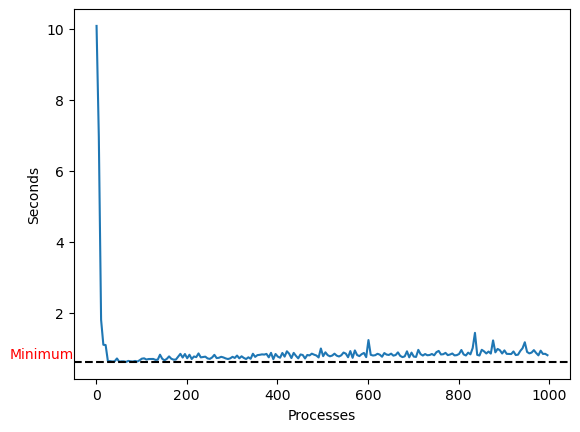

In [ ]:
plt.plot(np.arange(1,1000, step=5), time_list)
plt.axhline(np.min(time_list), color='black', linestyle='--')
plt.xlabel("Processes")
plt.ylabel("Seconds")
plt.text(-190, np.min(time_list)+0.1, 'Minimum', color='red')

## Exercise: Run a Regression!

For this exercise, you will write use matrices to write estimate the OLS coefficients for a set of data.

Remember that the equation for the coefficients are:

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

For this you will do the following:

1. Create a random normal 1000x10 matrix, and call it X
2. Create a random normal 1000 element vector named y
3. Write the equation above and save it in a variable called beta
4. input your X and y in the code below and compare!



In [ ]:
rng = np.random.default_rng(seed=1)

X = # Your code here
y = # your code here

beta = # your code here

In [ ]:
from statsmodels.api import OLS

print(OLS(y, X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              1.384
Date:                Thu, 20 Jul 2023   Prob (F-statistic):                       0.182
Time:                        13:22:48   Log-Likelihood:                         -1414.6
No. Observations:                1000   AIC:                                      2849.
Df Residuals:                     990   BIC:                                      2898.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------